# Pandas - Part 2

# Combining and Merging Datasets

In [2]:
import pandas as pd
import numpy as np

## Joining DataFrame

![](https://documentation.mindsphere.io/resources/html/predictive-learning/en-US/Images/Joins_Diagram.png)

In [3]:
d1=pd.DataFrame(
    {"key":["a","b","c","c","d","e"],
     "num1":range(6)})
d2=pd.DataFrame(
    {"key":["b","c","e","f"],
     "num2":range(4)})

In [4]:
print(d1)
print(d2)

  key  num1
0   a     0
1   b     1
2   c     2
3   c     3
4   d     4
5   e     5
  key  num2
0   b     0
1   c     1
2   e     2
3   f     3


In [6]:
# pandas merge with key


,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,e,5,2


In [5]:
# pandas merge d1 d2 not define key


,key,num1,num2
0,b,1,0
1,c,2,1
2,c,3,1
3,e,5,2


In [7]:
d3=pd.DataFrame(
    {"key1":["a","b","c","c","d","e"],
     "num1":range(6)})
d4=pd.DataFrame(
    {"key2":["b","c","e","f"],
     "num2":range(4)})

In [8]:
display(d3)
display(d4)

,key1,num1
0,a,0
1,b,1
2,c,2
3,c,3
4,d,4
5,e,5


,key2,num2
0,b,0
1,c,1
2,e,2
3,f,3


In [9]:
# pandas merge with left on, right on


,key1,num1,key2,num2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,e,5,e,2


In [10]:
# outer join


,key1,num1,key2,num2
0,a,0.0,NaN,NaN
1,b,1.0,b,0.0
2,c,2.0,c,1.0
3,c,3.0,c,1.0
4,d,4.0,NaN,NaN
5,e,5.0,e,2.0
6,NaN,NaN,f,3.0


In [11]:
# left join


,key1,num1,key2,num2
0,a,0,NaN,NaN
1,b,1,b,0.0
2,c,2,c,1.0
3,c,3,c,1.0
4,d,4,NaN,NaN
5,e,5,e,2.0


In [12]:
# right join


,key1,num1,key2,num2
0,b,1.0,b,0
1,c,2.0,c,1
2,c,3.0,c,1
3,e,5.0,e,2
4,NaN,NaN,f,3


In [13]:
# inner join


,key1,num1,key2,num2
0,b,1,b,0
1,c,2,c,1
2,c,3,c,1
3,e,5,e,2


In [14]:
df1=pd.DataFrame(
    {"key":["a","b","c","c","d","e"],
     "num1":range(6),
     "count":["one","three","two",
              "one","one","two"]})
df2=pd.DataFrame(
    {"key":["b","c","e","f"],
     "num2":range(4),
     "count":["one","two","two","two"]})

In [15]:
print(df1)
print(df2)

  key  num1  count
0   a     0    one
1   b     1  three
2   c     2    two
3   c     3    one
4   d     4    one
5   e     5    two
  key  num2 count
0   b     0   one
1   c     1   two
2   e     2   two
3   f     3   two


In [16]:
# outer join key: key, count


,key,num1,count,num2
0,a,0.0,one,NaN
1,b,1.0,three,NaN
2,c,2.0,two,1.0
3,c,3.0,one,NaN
4,d,4.0,one,NaN
5,e,5.0,two,2.0
6,b,NaN,one,0.0
7,f,NaN,two,3.0


In [17]:
pd.merge(df1, df2, on="key", how='outer')

,key,num1,count_x,num2,count_y
0,a,0.0,one,NaN,NaN
1,b,1.0,three,0.0,one
2,c,2.0,two,1.0,two
3,c,3.0,one,1.0,two
4,d,4.0,one,NaN,NaN
5,e,5.0,two,2.0,two
6,f,NaN,NaN,3.0,two


In [18]:
# join with suffixes


,key,num1,count_df1,num2,countdf2
0,b,1,three,0,one
1,c,2,two,1,two
2,c,3,one,1,two
3,e,5,two,2,two


## Merging on index

In [19]:
df1=pd.DataFrame(
    {"letter":["a","a","b",
               "b","a","c"],
     "num":range(6)}) 
df2=pd.DataFrame(
    {"value":[3,5,7]},
    index=["a","b","e"])

In [20]:
print(df1)
print(df2)

  letter  num
0      a    0
1      a    1
2      b    2
3      b    3
4      a    4
5      c    5
   value
a      3
b      5
e      7


In [21]:
# right index


,letter,num,value
0,a,0,3
1,a,1,3
4,a,4,3
2,b,2,5
3,b,3,5


In [22]:
right=pd.DataFrame(
    [[1,2],[3,4],[5,6]],
    index=["a","c","d"],
    columns=["Tom","Tim"])
left=pd.DataFrame(
    [[7,8],[9,10],[11,12],[13,14]],
    index=["a","b","e","f"],
    columns=["Sam","Kim"])

In [23]:
print(left)
print(right)

   Sam  Kim
a    7    8
b    9   10
e   11   12
f   13   14
   Tom  Tim
a    1    2
c    3    4
d    5    6


In [24]:
pd.merge(right,left, 
         right_index=True, 
         left_index=True, 
         how="outer")

,Tom,Tim,Sam,Kim
a,1.0,2.0,7.0,8.0
b,NaN,NaN,9.0,10.0
c,3.0,4.0,NaN,NaN
d,5.0,6.0,NaN,NaN
e,NaN,NaN,11.0,12.0
f,NaN,NaN,13.0,14.0


In [25]:
left.join(right)

,Sam,Kim,Tom,Tim
a,7,8,1.0,2.0
b,9,10,NaN,NaN
e,11,12,NaN,NaN
f,13,14,NaN,NaN


In [26]:
left.join(right,how="outer")

,Sam,Kim,Tom,Tim
a,7.0,8.0,1.0,2.0
b,9.0,10.0,NaN,NaN
c,NaN,NaN,3.0,4.0
d,NaN,NaN,5.0,6.0
e,11.0,12.0,NaN,NaN
f,13.0,14.0,NaN,NaN


In [27]:
data=pd.DataFrame([[1,3],[5,7],[9,11]],            
                  index=["a","b","f"],      
                  columns=["Alex","Keta"])
data

,Alex,Keta
a,1,3
b,5,7
f,9,11


In [28]:
# join multiple df without common key


,Sam,Kim,Tom,Tim,Alex,Keta
a,7.0,8.0,1.0,2.0,1.0,3.0
b,9.0,10.0,NaN,NaN,5.0,7.0
e,11.0,12.0,NaN,NaN,NaN,NaN
f,13.0,14.0,NaN,NaN,9.0,11.0


## Concatenating Along an Axis

In [29]:
seq = np.arange(20).reshape((4, 5))
seq

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [30]:
# numpy concatenate seq seq col


array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19, 15, 16, 17, 18, 19]])

In [31]:
# numpy concatenate seq seq row


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [32]:
data1 = pd.Series(
    [0, 1], index=['a', 'b'])
data2 = pd.Series(
    [2,3,4], index=['c','d','e'])
data3 = pd.Series(
    [5, 6], index=['f', 'g'])
print(data1)
print(data2)
print(data3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [33]:
# pandas concat data 1 2 3


a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [34]:
# pandas concat data 1 2 3 col


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [35]:
data1 = pd.DataFrame(
    np.random.randn(3, 4),
    columns=['a','b','c','d'])
data2 = pd.DataFrame(
    np.random.randn(2, 3),
    columns=['b','d','a'])
print(data1)
print(data2)

          a         b         c         d
0  0.927751 -0.421411  1.853774  2.445572
1 -0.167363 -0.287093 -1.150217 -0.381098
2  1.202231  1.433038  0.884716 -1.117301
          b         d        a
0 -0.937192 -0.235962 -0.26397
1 -0.973741 -0.598820 -1.57823


In [36]:
# concat and ignore_index


,a,b,c,d
0,0.927751,-0.421411,1.853774,2.445572
1,-0.167363,-0.287093,-1.150217,-0.381098
2,1.202231,1.433038,0.884716,-1.117301
0,-0.263970,-0.937192,NaN,-0.235962
1,-1.578230,-0.973741,NaN,-0.598820


In [37]:
pd.concat([data1,data2],ignore_index=True)

,a,b,c,d
0,0.927751,-0.421411,1.853774,2.445572
1,-0.167363,-0.287093,-1.150217,-0.381098
2,1.202231,1.433038,0.884716,-1.117301
3,-0.263970,-0.937192,NaN,-0.235962
4,-1.578230,-0.973741,NaN,-0.598820


# Reshaping and Pivoting

In [38]:
s1=pd.Series(
    np.arange(4),index=list("abcd"))
s2=pd.Series(
    np.arange(6,9),index=list("cde"))

In [39]:
print(s1)
print(s2)

a    0
b    1
c    2
d    3
dtype: int64
c    6
d    7
e    8
dtype: int64


In [40]:
data2=pd.concat([s1,s2],keys=["s1","s2"])
data2

s1  a    0
    b    1
    c    2
    d    3
s2  c    6
    d    7
    e    8
dtype: int64

In [41]:
# unstack


,a,b,c,d,e
s1,0.0,1.0,2.0,3.0,NaN
s2,NaN,NaN,6.0,7.0,8.0


In [42]:
data2.unstack().stack(dropna=True)

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
s2  c    6.0
    d    7.0
    e    8.0
dtype: float64

In [43]:
data2.unstack().stack(dropna=False)

s1  a    0.0
    b    1.0
    c    2.0
    d    3.0
    e    NaN
s2  a    NaN
    b    NaN
    c    6.0
    d    7.0
    e    8.0
dtype: float64

## Pivoting “Long” to “Wide” Format

In [44]:
stock=pd.DataFrame(
    {"fruit": ["apple", "plum","grape"]*2,
     "color": ["purple","yellow"]*3,
     "piece":[3,4,5,6,1,2]})

In [45]:
stock.sort_values(by=['fruit','color'])

,fruit,color,piece
0,apple,purple,3
3,apple,yellow,6
2,grape,purple,5
5,grape,yellow,2
4,plum,purple,1
1,plum,yellow,4


In [46]:
# pivot to wide table


color,purple,yellow
fruit,,
apple,3,6
grape,5,2
plum,1,4


In [47]:
stock["value"]=np.random.randn(len(stock))

In [48]:
stock

,fruit,color,piece,value
0,apple,purple,3,1.698667
1,plum,yellow,4,-0.541743
2,grape,purple,5,2.347941
3,apple,yellow,6,0.476036
4,plum,purple,1,-2.070295
5,grape,yellow,2,-0.056259


In [49]:
p=stock.pivot("fruit","color")
p

piece            value          
color purple yellow    purple    yellow
fruit                                  
apple      3      6  1.698667  0.476036
grape      5      2  2.347941 -0.056259
plum       1      4 -2.070295 -0.541743

In [50]:
p["value"]

color,purple,yellow
fruit,,
apple,1.698667,0.476036
grape,2.347941,-0.056259
plum,-2.070295,-0.541743


## Pivoting “Wide” to “Long” Format

In [2]:
import pandas as pd

In [3]:
data=pd.DataFrame(
    {"lesson":["math","stat","bio"],
     "Sam":[50,60,70],
     "Kim":[80,70,90],
     "Tom":[60,70,85]})
data

,lesson,Sam,Kim,Tom
0,math,50,80,60
1,stat,60,70,70
2,bio,70,90,85


In [4]:
# melt to long table


,lesson,variable,value
0,math,Sam,50
1,stat,Sam,60
2,bio,Sam,70
3,math,Kim,80
4,stat,Kim,70
5,bio,Kim,90
6,math,Tom,60
7,stat,Tom,70
8,bio,Tom,85


In [53]:
group.rename(columns={'variable':'student','value':'score'}, inplace=True)
group

,lesson,student,score
0,math,Sam,50
1,stat,Sam,60
2,bio,Sam,70
3,math,Kim,80
4,stat,Kim,70
5,bio,Kim,90
6,math,Tom,60
7,stat,Tom,70
8,bio,Tom,85


In [54]:
data=group.pivot(
    "lesson","student","score")
data

student,Kim,Sam,Tom
lesson,,,
bio,90,70,85
math,80,50,60
stat,70,60,70


In [55]:
data.reset_index()

student,lesson,Kim,Sam,Tom
0,bio,90,70,85
1,math,80,50,60
2,stat,70,60,70


In [56]:
data = data.reset_index()

In [57]:
data.columns

Index(['lesson', 'Kim', 'Sam', 'Tom'], dtype='object', name='student')

# Groupby

## What is GroupBy?

In [4]:
import pandas as pd
import numpy as np
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,0.913703,0.242212
1,a,two,-0.235824,-0.313265
2,b,three,0.394149,-0.182152
3,b,one,1.636661,1.622988
4,a,two,-0.845021,1.888953
5,b,three,0.809641,-3.754298


In [60]:
group=df["data1"].groupby(df["key1"])

In [61]:
group

In [62]:
group.mean()

key1
a   -0.322173
b    1.376205
Name: data1, dtype: float64

In [63]:
ave=df["data1"].groupby([df["key1"],df["key2"]]).mean()
ave

key1  key2 
a     one     -1.498984
      two      0.266232
b     one      1.632912
      three    1.247851
Name: data1, dtype: float64

In [64]:
ave.unstack()

key2,one,three,two
key1,,,
a,-1.498984,NaN,0.266232
b,1.632912,1.247851,NaN


In [65]:
df.groupby("key1").mean()

,data1,data2
key1,,
a,-0.322173,-0.282653
b,1.376205,-0.421867


In [66]:
df.groupby(["key1","key2"]).mean()

data1     data2
key1 key2                     
a    one   -1.498984 -0.108706
     two    0.266232 -0.369626
b    one    1.632912  2.312004
     three  1.247851 -1.788802

## Selecting a Column or Subset of Columns

In [5]:
df

,key1,key2,data1,data2
0,a,one,0.913703,0.242212
1,a,two,-0.235824,-0.313265
2,b,three,0.394149,-0.182152
3,b,one,1.636661,1.622988
4,a,two,-0.845021,1.888953
5,b,three,0.809641,-3.754298


In [68]:
# mean of data1 by key1


,key1,data1
0,a,-0.322173
1,b,1.376205


In [69]:
# mean of data1 by key1, key 2


,key1,key2,data1
0,a,one,-1.498984
1,a,two,0.266232
2,b,one,1.632912
3,b,three,1.247851


In [70]:
# mean of data1, data2 by key1


,key1,data1,data2
0,a,-0.322173,-0.282653
1,b,1.376205,-0.421867


In [7]:
# tinh trung binh data2 theo tung key2


,key2,data2
0,one,0.932600
1,three,-1.968225
2,two,0.787844


## Grouping by Index Levels

In [71]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [72]:
data.head()

A                             B          
          1         2         3         1         2
0  0.654904 -0.586042  0.868970  1.325590  0.391263
1  0.756810 -0.024360  0.720485 -0.532666  0.065998
2 -1.338222 -0.828367  1.294123  1.137183  1.063876
3 -0.717314 -0.988273  0.982095 -1.167832  0.928038

In [73]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0       0.654904 -0.586042  0.868970  1.325590  0.391263
1       0.756810 -0.024360  0.720485 -0.532666  0.065998
2      -1.338222 -0.828367  1.294123  1.137183  1.063876
3      -0.717314 -0.988273  0.982095 -1.167832  0.928038

In [74]:
data.groupby(level="letter",axis=1).sum()

letter,A,B
0,0.937832,1.716853
1,1.452936,-0.466668
2,-0.872466,2.201058
3,-0.723492,-0.239794


## Application with Real Data Set 

In [5]:
# Data/vgsalesGlobale.csv


In [6]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:

# describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# Global_Sales average



0.53744065550074

In [10]:
# total global sales of each genre


Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [14]:
# Genre groupby


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.909929,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.130878,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.630383,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.258480,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.820776,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.243433,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.840131,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055744,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.918877,0.444733,0.239137,0.029221,0.078389,0.791885


In [35]:
%matplotlib inline

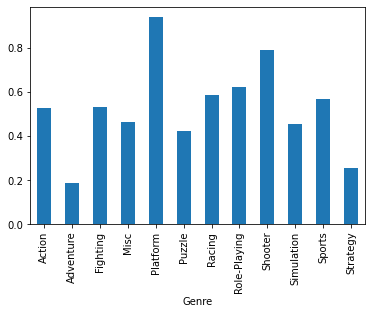

In [16]:
group["Global_Sales"].plot(kind="bar")

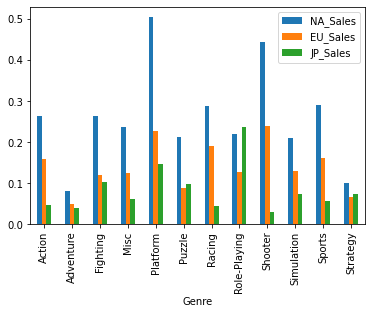

In [17]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].plot(kind="bar")

In [85]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
'''
    Tạo bảng mean_sale: ghi nhận doanh thu trung bình của 4 thị trường NA, EU, JP, Other theo từng tựa game
'''

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,'98 Koshien,0.150,0.10,0.12,0.03
1,.hack//G.U. Vol.1//Rebirth,0.000,0.00,0.17,0.00
2,.hack//G.U. Vol.2//Reminisce,0.110,0.09,0.00,0.03
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.000,0.00,0.16,0.00
4,.hack//G.U. Vol.3//Redemption,0.000,0.00,0.17,0.00
...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,0.010,0.00,0.00,0.00
11489,uDraw Studio,1.670,0.58,0.00,0.20
11490,uDraw Studio: Instant Artist,0.045,0.05,0.00,0.01
11491,wwe Smackdown vs. Raw 2006,1.570,1.02,0.00,0.41


In [ ]:
'''
    Tạo bảng publish_year: ghi nhận năm phát hành của từng tựa game
'''

,Name,Year
0,'98 Koshien,1998
1,.hack//G.U. Vol.1//Rebirth,2006
2,.hack//G.U. Vol.2//Reminisce,2006
3,.hack//G.U. Vol.2//Reminisce (jp sales),2006
4,.hack//G.U. Vol.3//Redemption,2007
...,...,...
11488,thinkSMART: Chess for Kids,2011
11489,uDraw Studio,2010
11490,uDraw Studio: Instant Artist,2011
11491,wwe Smackdown vs. Raw 2006,0


In [ ]:
'''
    Merge bảng mean_sale và publish_year, key là tựa game
'''

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year
0,'98 Koshien,0.150,0.10,0.12,0.03,1998
1,.hack//G.U. Vol.1//Rebirth,0.000,0.00,0.17,0.00,2006
2,.hack//G.U. Vol.2//Reminisce,0.110,0.09,0.00,0.03,2006
3,.hack//G.U. Vol.2//Reminisce (jp sales),0.000,0.00,0.16,0.00,2006
4,.hack//G.U. Vol.3//Redemption,0.000,0.00,0.17,0.00,2007
...,...,...,...,...,...,...
11488,thinkSMART: Chess for Kids,0.010,0.00,0.00,0.00,2011
11489,uDraw Studio,1.670,0.58,0.00,0.20,2010
11490,uDraw Studio: Instant Artist,0.045,0.05,0.00,0.01,2011
11491,wwe Smackdown vs. Raw 2006,1.570,1.02,0.00,0.41,0


In [ ]:
'''
    Tạo bảng sale gồm các cột Name, NA_Sales, EU_Sales, JP_Sales, Other_Sales
    Chuyển bảng sale từ dạng wide về dạng long table
'''

,Name,Market,Sale
0,Wii Sports,NA_Sales,41.49
1,Super Mario Bros.,NA_Sales,29.08
2,Mario Kart Wii,NA_Sales,15.85
3,Wii Sports Resort,NA_Sales,15.75
4,Pokemon Red/Pokemon Blue,NA_Sales,11.27
...,...,...,...
66387,Woody Woodpecker in Crazy Castle 5,Other_Sales,0.00
66388,Men in Black II: Alien Escape,Other_Sales,0.00
66389,SCORE International Baja 1000: The Official Game,Other_Sales,0.00
66390,Know How 2,Other_Sales,0.00


# Pivot Tables

In [91]:
df=pd.DataFrame(
    {"class":list("ABC")*4,
     "lesson":["math","stat"]*6,
     "sex":list("MFMM")*3,
     "sibling":[1,2,3]*4,
     "score":np.arange(40,100,5)})

In [92]:
df

,class,lesson,sex,sibling,score
0,A,math,M,1,40
1,B,stat,F,2,45
2,C,math,M,3,50
3,A,stat,M,1,55
4,B,math,M,2,60
5,C,stat,F,3,65
6,A,math,M,1,70
7,B,stat,M,2,75
8,C,math,M,3,80
9,A,stat,F,1,85


In [93]:
d = df.groupby(["lesson","class"])["score"].mean().reset_index()
d

,lesson,class,score
0,math,A,55
1,math,B,75
2,math,C,65
3,stat,A,70
4,stat,B,60
5,stat,C,80


In [94]:
df.groupby(["lesson","class"])["score"].aggregate("mean").unstack()

class,A,B,C
lesson,,,
math,55,75,65
stat,70,60,80


In [95]:
# pivot table


score        
class      A   B   C
lesson              
math      55  75  65
stat      70  60  80

In [11]:
df.pivot_table(
    values=["sibling","score"],
    index=["class","lesson"],
    columns="sex")

score       sibling     
sex              F     M       F    M
class lesson                         
A     math     NaN  55.0     NaN  1.0
      stat    85.0  55.0     1.0  1.0
B     math     NaN  75.0     NaN  2.0
      stat    45.0  75.0     2.0  2.0
C     math     NaN  65.0     NaN  3.0
      stat    65.0  95.0     3.0  3.0

In [96]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True)

score                  sibling         
sex              F          M   All       F    M All
class lesson                                        
A     math     NaN  55.000000  55.0     NaN  1.0   1
      stat    85.0  55.000000  70.0     1.0  1.0   1
B     math     NaN  75.000000  75.0     NaN  2.0   2
      stat    45.0  75.000000  60.0     2.0  2.0   2
C     math     NaN  65.000000  65.0     NaN  3.0   3
      stat    65.0  95.000000  80.0     3.0  3.0   3
All           65.0  68.333333  67.5     2.0  2.0   2

In [97]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",margins=True,aggfunc='sum')

score             sibling          
sex               F      M  All       F     M All
class lesson                                     
A     math      NaN  110.0  110     NaN   2.0   2
      stat     85.0   55.0  140     1.0   1.0   2
B     math      NaN  150.0  150     NaN   4.0   4
      stat     45.0   75.0  120     2.0   2.0   4
C     math      NaN  130.0  130     NaN   6.0   6
      stat     65.0   95.0  160     3.0   3.0   6
All           195.0  615.0  810     6.0  18.0  24

In [98]:
df.pivot_table(
    ["sibling","score"],
    index=["class","lesson"],
    columns="sex",fill_value=0)

score     sibling   
sex              F   M       F  M
class lesson                     
A     math       0  55       0  1
      stat      85  55       1  1
B     math       0  75       0  2
      stat      45  75       2  2
C     math       0  65       0  3
      stat      65  95       3  3

## Cross-Tabulations: Crosstab

In [99]:
# crosstab df sibling and lesson


lesson,math,stat
sibling,,
1,2,2
2,2,2
3,2,2


In [100]:
pd.crosstab([df.sibling, df.lesson], df.sex)

sex             F  M
sibling lesson      
1       math    0  2
        stat    1  1
2       math    0  2
        stat    1  1
3       math    0  2
        stat    1  1

You can download the data set from https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [101]:
births=pd.read_csv("Data/births.txt")

In [102]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [103]:
births["ten_year"]=10*(births["year"]//10)
births.pivot_table("births",
                   index="ten_year",
                   columns="gender",
                   aggfunc="sum")

gender,F,M
ten_year,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [20]:
%matplotlib inline

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
sns.set() #For style

Text(0, 0.5, 'Annual total births')

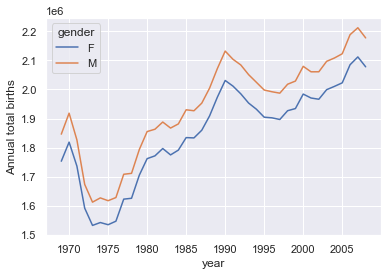

In [106]:
births.pivot_table("births",
                   index="year",
                   columns="gender",
                   aggfunc="sum").plot()
plt.ylabel("Annual total births")

# Working with Text Data

In [107]:
"hello".upper()

'HELLO'

## Vectorized String Functions in Pandas

In [2]:
import pandas as pd

In [108]:
data=["tim","Kate","SUSan",np.nan,"aLEX"]

In [109]:
name=pd.Series(data)
name

0      tim
1     Kate
2    SUSan
3      NaN
4     aLEX
dtype: object

In [110]:
name.str.capitalize()

0      Tim
1     Kate
2    Susan
3      NaN
4     Alex
dtype: object

In [111]:
name.str.lower()

0      tim
1     kate
2    susan
3      NaN
4     alex
dtype: object

In [112]:
name.str.len()

0    3.0
1    4.0
2    5.0
3    NaN
4    4.0
dtype: float64

In [113]:
name.str.startswith("a")

0    False
1    False
2    False
3      NaN
4     True
dtype: object

In [122]:
df=pd.DataFrame(
    np.random.randn(3,2),
    columns=["Column A","Column B"],
    index=range(3))
df

,Column A,Column B
0,0.652176,-0.315410
1,0.711371,1.055193
2,-0.147828,-0.545627


In [115]:
df.columns

Index(['Column A', 'Column B'], dtype='object')

In [124]:
df.columns.str.lower().str.replace(" ","_").to_list()

['column_a', 'column_b']

In [125]:
df.columns = df.columns.str.lower().str.replace(" ","_").to_list()
df

,column_a,column_b
0,0.652176,-0.315410
1,0.711371,1.055193
2,-0.147828,-0.545627


In [126]:
s=pd.Series(["a_b_c","c_d_e",np.nan,"f_g_h"])
s

0    a_b_c
1    c_d_e
2      NaN
3    f_g_h
dtype: object

In [127]:
s.str.split("_").str[1]

0      b
1      d
2    NaN
3      g
dtype: object

In [128]:
s.str.split("_",expand=True)

,0,1,2
0,a,b,c
1,c,d,e
2,NaN,NaN,NaN
3,f,g,h


In [129]:
s.str.split("_",expand=True,n=1)

,0,1
0,a,b_c
1,c,d_e
2,NaN,NaN
3,f,g_h


In [130]:
money=pd.Series(["15","-$20","$30000"])
money

0        15
1      -$20
2    $30000
dtype: object

In [131]:
money.str.replace("-\$","")

0        15
1        20
2    $30000
dtype: object

In [132]:
money.str.replace("-\$","-")

0        15
1       -20
2    $30000
dtype: object

You can use google or pandas.pydata.org to see the string methods of Pandas documentation.

In [3]:
import pandas as pd
film=pd.read_csv("http://bit.ly/imdbratings")

In [4]:
film.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
# viet hoa cot title


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,TOOTSIE,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,BACK TO THE FUTURE PART III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,POLTERGEIST,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [6]:
# viet hoa chu cai dau tien cua ten cot


In [7]:
film.head()

,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
0,9.3,THE SHAWSHANK REDEMPTION,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,THE GODFATHER,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,THE GODFATHER: PART II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,THE DARK KNIGHT,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,PULP FICTION,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [8]:
# loc lay nhung dong co dien vien Brad Pitt


,Star_rating,Title,Content_rating,Genre,Duration,Actors_list
9,8.9,FIGHT CLUB,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
24,8.7,SE7EN,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
106,8.3,SNATCH.,R,Comedy,102,"[u'Jason Statham', u'Brad Pitt', u'Benicio Del..."
114,8.3,INGLOURIOUS BASTERDS,R,Adventure,153,"[u'Brad Pitt', u'Diane Kruger', u'Eli Roth']"
264,8.1,TWELVE MONKEYS,R,Mystery,129,"[u'Bruce Willis', u'Madeleine Stowe', u'Brad P..."
508,7.8,THE CURIOUS CASE OF BENJAMIN BUTTON,PG-13,Drama,166,"[u'Brad Pitt', u'Cate Blanchett', u'Tilda Swin..."
577,7.8,OCEAN'S ELEVEN,PG-13,Crime,116,"[u'George Clooney', u'Brad Pitt', u'Julia Robe..."
683,7.7,FURY,R,Action,134,"[u'Brad Pitt', u'Shia LaBeouf', u'Logan Lerman']"
776,7.6,MONEYBALL,PG-13,Biography,133,"[u'Brad Pitt', u'Robin Wright', u'Jonah Hill']"
779,7.6,INTERVIEW WITH THE VAMPIRE: THE VAMPIRE CHRONI...,R,Horror,123,"[u'Brad Pitt', u'Tom Cruise', u'Antonio Bander..."


In [9]:
film.Actors_list.str.replace("[","")

0      u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
1         u'Marlon Brando', u'Al Pacino', u'James Caan']
2      u'Al Pacino', u'Robert De Niro', u'Robert Duva...
3      u'Christian Bale', u'Heath Ledger', u'Aaron Ec...
4      u'John Travolta', u'Uma Thurman', u'Samuel L. ...
                             ...                        
974    u'Dustin Hoffman', u'Jessica Lange', u'Teri Ga...
975    u'Michael J. Fox', u'Christopher Lloyd', u'Mar...
976    u'Russell Crowe', u'Paul Bettany', u'Billy Boyd']
977    u'JoBeth Williams', u"Heather O'Rourke", u'Cra...
978    u'Charlie Sheen', u'Michael Douglas', u'Tamara...
Name: Actors_list, Length: 979, dtype: object

In [10]:
# xoa ky tu thua []


0       u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton'
1          u'Marlon Brando', u'Al Pacino', u'James Caan'
2      u'Al Pacino', u'Robert De Niro', u'Robert Duvall'
3      u'Christian Bale', u'Heath Ledger', u'Aaron Ec...
4      u'John Travolta', u'Uma Thurman', u'Samuel L. ...
                             ...                        
974    u'Dustin Hoffman', u'Jessica Lange', u'Teri Garr'
975    u'Michael J. Fox', u'Christopher Lloyd', u'Mar...
976     u'Russell Crowe', u'Paul Bettany', u'Billy Boyd'
977    u'JoBeth Williams', u"Heather O'Rourke", u'Cra...
978    u'Charlie Sheen', u'Michael Douglas', u'Tamara...
Name: Actors_list, Length: 979, dtype: object

In [ ]:
# replace u,''
# split , -> expend new columns
# wide -> long

In [12]:
t.Actors_list.str.replace("[","").str.replace("]","").str.replace("u'","").str.split(",",expand=True)

,0,1,2
0,Tim Robbins',Morgan Freeman',Bob Gunton'
1,Marlon Brando',Al Pacino',James Caan'
2,Al Pacino',Robert De Niro',Robert Duvall'
3,Christian Bale',Heath Ledger',Aaron Eckhart'
4,John Travolta',Uma Thurman',Samuel L. Jackson'
...,...,...,...
974,Dustin Hoffman',Jessica Lange',Teri Garr'
975,Michael J. Fox',Christopher Lloyd',Mary Steenburgen'
976,Russell Crowe',Paul Bettany',Billy Boyd'
977,JoBeth Williams',"u""Heather O'Rourke""",Craig T. Nelson'


In [11]:
# t.Actors_list.str.replace("[","").str.replace("]","").str.replace("u","").str.split(",",expand=True)

t = film[['Title','Actors_list']]
t2 = t.drop('Actors_list',axis=1)\
.join(t.Actors_list.str.replace("[","").str.replace("]","").str.replace("u'","").str.split(",",expand=True))
t2 = pd.melt(t2,['Title']).rename(columns={'variable':'order','value':'Actor_name'})
t2

,Title,order,Actor_name
0,THE SHAWSHANK REDEMPTION,0,Tim Robbins'
1,THE GODFATHER,0,Marlon Brando'
2,THE GODFATHER: PART II,0,Al Pacino'
3,THE DARK KNIGHT,0,Christian Bale'
4,PULP FICTION,0,John Travolta'
...,...,...,...
2932,TOOTSIE,2,Teri Garr'
2933,BACK TO THE FUTURE PART III,2,Mary Steenburgen'
2934,MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD,2,Billy Boyd'
2935,POLTERGEIST,2,Craig T. Nelson'


# Working with Time Series in Pandas

## to_datetime method

In [134]:
# to datetime "15/08/2019"

# YYYY-MM-DD



Timestamp('2019-08-15 00:00:00')

In [135]:
date=["2019-01-05","jan 6, 2019",
      "7/05/2019","2019/01/9","20190110"]

In [136]:
pd.to_datetime(date)

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-07-05', '2019-01-09',
               '2019-01-10'],
              dtype='datetime64[ns]', freq=None)

In [137]:
pd.to_datetime("03/05/2019")

Timestamp('2019-03-05 00:00:00')

In [138]:
pd.to_datetime("03/05/2019", dayfirst=True)

Timestamp('2019-05-03 00:00:00')

In [139]:
pd.to_datetime("05/03/2019", dayfirst=True)

Timestamp('2019-03-05 00:00:00')

In [140]:
pd.to_datetime("05*03*2019", 
               format="%d*%m*%Y")

Timestamp('2019-03-05 00:00:00')

In [141]:
pd.to_datetime("05$03$2019", 
               format="%d$%m$%Y")

Timestamp('2019-03-05 00:00:00')

In [142]:
date=["2019-01-05",
     "jan 6, 2019",
     "7/05/2019",
     "2019/01/9",
     "20190110",
      "xyz"]

In [143]:
pd.to_datetime(date)

ParserError: Unknown string format: xyz

In [144]:
pd.to_datetime(date, errors='coerce')

DatetimeIndex(['2019-01-05', '2019-01-06', '2019-07-05', '2019-01-09',
               '2019-01-10', 'NaT'],
              dtype='datetime64[ns]', freq=None)

In [145]:
t=1000000000

In [146]:
pd.to_datetime(t, unit="s")

Timestamp('2001-09-09 01:46:40')

In [147]:
24*60*60*365*31

977616000

In [ ]:
'''
Load file supermarket_sales_nan
Xác định doanh số của mỗi siêu thị (Branch)
Xác định doanh số theo từng tháng của mỗi siêu thị
Xác định doanh thu và số lượng đơn hàng của mỗi siêu thị
Xác định doanh thu và đơn giá trung bình của mỗi siêu thị
Đổi format về lại dạng bảng sau khi groupby
Xác định doanh thu theo khoảng giá (4 percentile)
Xác định doanh số của từng loại khách hàng
Xác định % chi phí theo từng dòng sản phẩm
In ra bảng info của data
Xử lý các giá trị bị thiếu của cột đơn giá (fillna bằng mean)
Sử dụng pivot table tính toán doanh thu theo loại khách hàng và giới tính của từng siêu thị 
Sử dụng Crosstab đếm số lượng đơn hàng theo loại khách hàng của từng siêu thị
'''

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,0.547222,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,0.436806,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,0.557639,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,0.856250,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,0.442361,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
#Xác định doanh số của mỗi siêu thị (Branch)


,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


In [15]:
#Xác định doanh số theo từng tháng của mỗi siêu thị


,Branch,year_month,Total
0,A,2019-01,38681.1285
1,A,2019-02,29860.1205
2,A,2019-03,37659.1215
3,B,2019-01,37176.0585
4,B,2019-02,34424.2710
5,B,2019-03,34597.3425
6,C,2019-01,40434.6810
7,C,2019-02,32934.9825
8,C,2019-03,37199.0430


In [16]:
#Xác định doanh thu và số lượng đơn hàng của mỗi siêu thị


,Branch,Total,Quantity
0,A,106200.3705,1859
1,B,106197.6720,1820
2,C,110568.7065,1831


In [17]:
#Xác định doanh thu và đơn giá trung bình của mỗi siêu thị


,Branch,Total,Unit price
0,A,106200.3705,54.536627
1,B,106197.6720,55.990406
2,C,110568.7065,56.129397


In [18]:
# Xác định doanh thu theo khoảng giá (4 percentile)


count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [19]:
# Xác định doanh số của từng loại khách hàng


,Customer type,Quantity
0,Member,2785
1,Normal,2725


In [20]:
# Xác định % chi phí theo từng dòng sản phẩm


,Product line,%cost
0,Electronic accessories,0.952381
1,Fashion accessories,0.952381
2,Food and beverages,0.952381
3,Health and beauty,0.952381
4,Home and lifestyle,0.952381
5,Sports and travel,0.952381


In [21]:
# info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               967 non-null    float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   float64       
 12  Payment                  1000 non-n

In [22]:
# Xử lý các giá trị bị thiếu của cột đơn giá (fillna bằng mean)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   float64       
 12  Payment                  1000 non-n

In [23]:
# Sử dụng pivot table tính toán doanh thu theo loại khách hàng và giới tính của từng siêu thị 


Gender,Female,Male
Customer type,,
Member,337.727753,316.985419
Normal,332.233256,305.047581


In [24]:
# Sử dụng Crosstab đếm số lượng đơn hàng theo loại khách hàng của từng siêu thị 


Branch,A,B,C
Customer type,,,
Member,167,165,169
Normal,173,167,159
